<a href="https://colab.research.google.com/github/tengkumuazabs/cxrdiagnosis-python/blob/develop/feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import pandas as pd
import os
import shutil
# from keras.models import Model, Sequential
# from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras.layers import BatchNormalization
# import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
# from PIL import Image
# import shutil
# import split_folder as sp
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
# from keras.utils import to_categorical
# import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, f1_score, recall_score, classification_report
# from keras.models import Sequential
# from keras.layers import Dense, Flatten, BatchNormalization, Dropout

In [ ]:
SIZE = 224
# inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))
model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
# model.summary()

In [ ]:
#Understand the filters in the model 
#Let us pick the first hidden layer as the layer of interest.
layer = model.layers #Conv layers at 1, 3, 6, 8, 11, 13, 15
filters, biases = model.layers[1].get_weights()
print(layer[1].name, filters.shape)

block1_conv1 (3, 3, 3, 64)


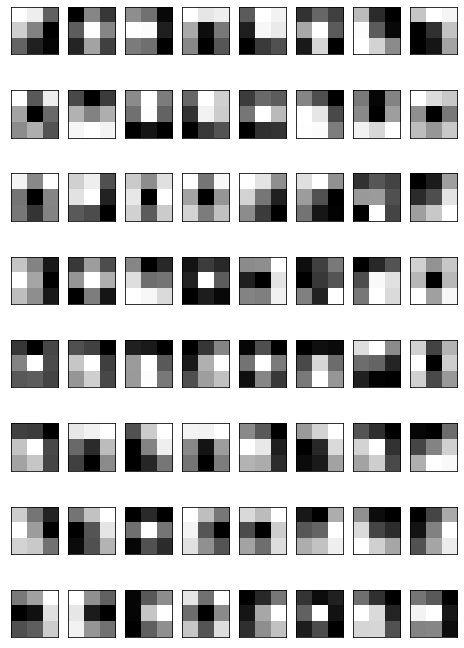

In [ ]:
# plot filters

fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()    

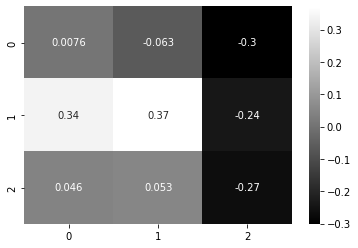

In [ ]:
sns.heatmap(f[:, :, 0], annot=True, cmap='gray')

In [ ]:
# ====================

In [ ]:
# ======================

In [ ]:
SIZE = 299
model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
model_inception.summary()

In [ ]:
#Understand the filters in the model 
#Let us pick the first hidden layer as the layer of interest.
layer = model_inception.layers
filters = model_inception.layers[1].get_weights()
filters=np.array(filters[0])
print(layer[1].name, filters.shape)

conv2d (3, 3, 3, 32)


In [ ]:
filters

array([[[[-4.59105551e-01, -4.14526574e-02, -3.62577499e-03,
          -9.87672508e-02, -3.37070860e-02,  4.79929037e-02,
           2.32542142e-01,  3.23927671e-01,  5.90160079e-02,
           9.47738215e-02,  4.24996056e-02,  1.26620471e-01,
           1.33215979e-01,  1.22741833e-01, -7.92686343e-02,
           2.08227970e-02, -1.99647829e-01, -3.02687973e-01,
          -2.10659921e-01, -3.52898419e-01, -5.58023095e-01,
           3.20223093e-01,  4.53596050e-03, -3.09266411e-02,
          -6.86957911e-02,  2.00968519e-01,  1.14542745e-01,
           2.40372881e-01,  1.52943470e-02,  5.96231259e-02,
          -5.85714653e-02,  8.78173351e-01],
         [ 3.16376328e-01, -4.78494260e-03, -6.84681814e-03,
           7.44503662e-02, -1.97458476e-01,  5.20143658e-02,
          -1.24460436e-01,  3.36123914e-01,  3.01678218e-02,
          -1.26477107e-01, -1.05597451e-01, -5.31241074e-02,
          -2.43102223e-01,  1.66047230e-01, -1.03186309e-01,
          -6.55613691e-02,  2.60930099e-

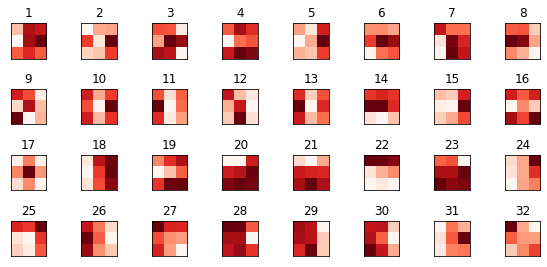

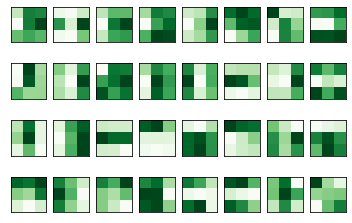

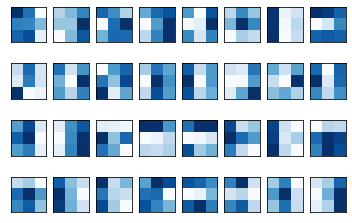

In [75]:
# plot filters

fig1=plt.figure(figsize=(8, 4))

columns = 8
rows = 4
n_filters = columns * rows

for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.title.set_text(i)
    plt.tight_layout()
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[0], cmap='Reds') #Show only the filters from 0th channel (R)
plt.show() 

for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[1], cmap='Greens') #Show only the filters from 1st channel (G)
plt.show() 

for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[2], cmap='Blues') #Show only the filters from 2nd channel (B)
plt.show() 

   

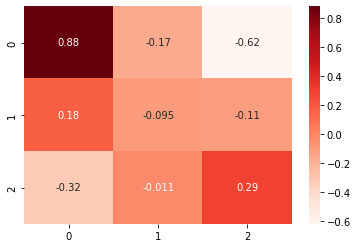

In [59]:
sns.heatmap(f[0], annot=True, cmap='Reds')

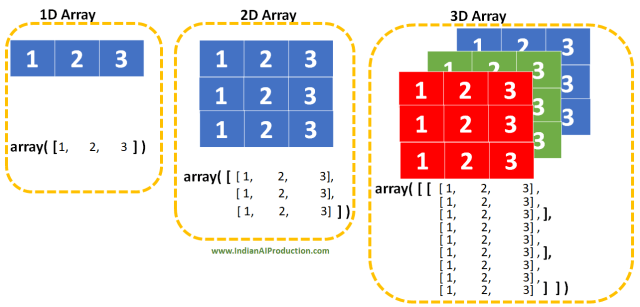

In [ ]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://i1.wp.com/indianaiproduction.com/wp-content/uploads/2019/06/NumPy-array.png?resize=640%2C307&ssl=1')
img = Image.open(BytesIO(response.content))
img